This notebook should be run SE Emotion Environment

In [4]:
import csv
import pickle
filename = 'C:\\Users\\umg\\Development\\SEmotion\\03_Journal\\Data\\merged_training.pkl'
infile = open(filename,'rb')
training_data = pickle.load(infile)
infile.close()

In [5]:
training_data.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [6]:
training_data.count()

text        416809
emotions    416809
dtype: int64

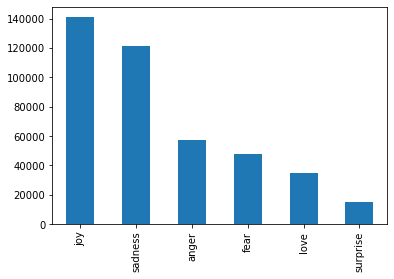

In [7]:
training_data.emotions.value_counts().plot.bar()

In [8]:
type(training_data)

pandas.core.frame.DataFrame

In [8]:
training_data.to_csv('C:\\Users\\umg\\Development\\SEmotion\\03_Journal\\Data\\training_data.csv')

In [9]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-small-finetuned-emotion")


C:\Users\umg\.conda\envs\SE Emotion\lib\site-packages\transformers\modeling_auto.py:798: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [10]:
def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)

  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label



In [11]:
#Nicely formated timespan from Jeff Heaton
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int((sec_elapsed % (60*60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [12]:
 get_emotion("i feel as if i havent blogged in ages are at least truly blogged i am doing an update cute") # Output: 'joy'



'joy'

In [13]:
 get_emotion("i have a feeling i kinda lost my best friend") # Output: 'sadness'

'sadness'

In [14]:
get_emotion("I want to build a cloud ""based"" solution in which I would give a pool of images; and then ask for find similar image to a particular image from this pool of images !! Pool of images can be like all t-shirt images. Hence, similar images mean t-shirt with similar design/color/sleeves etc.Tagging solution won't work as they are at very high level.AWS Rekognition gives facial similarities .. but not product similarities .. it does not work like for images of dresses..I am open to use any cloud providers; but all are providing tags of the image which won't help me.One solution could be that I use some ML framework like MXNet/Tensorflow, create my own models, train them and then use.. But is there any other ready made solution on any of cloud providers ?")

'joy'

In [15]:
get_emotion("Using Airflow I want to get the result of an SQL Query fomratted as a pandas DataFrame.Above is the python function that I want to execute in a. Here is the DAG:But, the work step is throwing an exception. Here is the log :This exception is due to this, which accroding to the descriptionhides another exception, still strange because I'm not doing any insertion.What am I doing wrong? Maybe there is a problem withused in the. Or, dataFrame is not the way to go in order to handle query results.PS: result of")

'fear'

In [16]:
get_emotion("I am trying to use aws rekognition to compare faces but it will give an error saying check if the object and bucket exist in same regionwhile uploading the image i have set the content type to image/jpeg formatbut when i upload an image using aws console from computer the rekognition will work ! am i doing something wrong in this code")

'anger'

In [18]:
#Read in the visionAPIClassificationFile - the important columns are "ID" and "Question Text"
import pandas as pd
visionapi_df = pd.DataFrame
filename = 'C:\\Users\\umg\\Development\\SEmotion\\03_Journal\\Data\VisionAPIQuestions_source.csv'
visionapi_df = pd.read_csv(filename, sep=',', )


In [19]:
#Nicely formated timespan from Jeff Heaton
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int((sec_elapsed % (60*60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)



In [ ]:
#Strip out the delimit the "" so that HuggingFace API calls will work

In [40]:
#Process the Vision API dataframe and write result to CSV file
import time
totalCount = 0
start_time = time.time()
result_df = visionapi_df.copy()  # take a copy of the dataframe

for index, row in result_df.iterrows():
    totalCount+=1
    result_df.loc[index,'T5Result'] = get_emotion(row['Question Text']) 
    if totalCount > 1 and (totalCount % 100) == 0:
        print("We have processed questions {:,}".format(totalCount))
time_took = time.time() - start_time
print(f"Total pre-processing runtime: {hms_string(time_took)}")
t5filename = 'C:\\Users\\umg\\Development\\SEmotion\\03_Journal\\Data\VisionAPIQuestions_T5out.csv'
result_df.to_csv(t5filename)

We have processed questions 100
We have processed questions 200


Token indices sequence length is longer than the specified maximum sequence length for this model (650 > 512). Running this sequence through the model will result in indexing errors


We have processed questions 300
We have processed questions 400


Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


We have processed questions 500


Token indices sequence length is longer than the specified maximum sequence length for this model (791 > 512). Running this sequence through the model will result in indexing errors


We have processed questions 600
We have processed questions 700
We have processed questions 800
We have processed questions 900


Token indices sequence length is longer than the specified maximum sequence length for this model (588 > 512). Running this sequence through the model will result in indexing errors


We have processed questions 1,000


Token indices sequence length is longer than the specified maximum sequence length for this model (1215 > 512). Running this sequence through the model will result in indexing errors


We have processed questions 1,100
We have processed questions 1,200


Token indices sequence length is longer than the specified maximum sequence length for this model (569 > 512). Running this sequence through the model will result in indexing errors


Total pre-processing runtime: 0:01:40.05


In [26]:
result_df.to_csv(t5filename)

In [39]:
result_df.head()

,ID,FearID,fear,JoyID,joy,LoveID,love,SadID,Sadness,SurpriseID,surprise,AngerID,anger,NoEmotionID,none,NoOfEmotions,Include,Question Text,T5Result
0,45033467,45033467,fear,45033467,NoJoy,45033467,love,45033467,notsadness,45033467,notsurprise,45033467,NotAnger,45033467,NaN,2.0,Yes,"""I want to build a cloud based solution in whi...",joy
1,45546462,45546462,fear,45546462,NoJoy,45546462,notlove,45546462,notsadness,45546462,notsurprise,45546462,NotAnger,45546462,NaN,1.0,YES,"""I have problem with access to camera first ti...",joy
2,49619897,49619897,notfear,49619897,NoJoy,49619897,notlove,49619897,notsadness,49619897,surprise,49619897,Anger,49619897,NaN,2.0,Yes,"""Using Airflow I want to get the result of an ...",fear
3,55388663,55388663,notfear,55388663,NoJoy,55388663,notlove,55388663,notsadness,55388663,notsurprise,55388663,NotAnger,55388663,NoEmotion,0.0,Yes,"""I try to use Google Cloud Vision API to detec...",joy
4,52833231,52833231,notfear,52833231,NoJoy,52833231,notlove,52833231,notsadness,52833231,notsurprise,52833231,NotAnger,52833231,NoEmotion,0.0,Yes,"""How can i write a test case in Junit for amaz...",joy
